In [ ]:
import torch
from torch.utils.data import TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from models.fair import BinaryFair
from models.classifier import BinaryClassifier
from utils.StatisticalDistance import EmpiricalStatisticalDistance
from sklearn.manifold import TSNE, SpectralEmbedding
from sklearn.metrics import accuracy_score
from tqdm.auto import trange

%load_ext autoreload
%autoreload 2

In [ ]:
data_file = torch.load("data/Crime/data.pt")

/home/jt/miniconda3/envs/fnf4hep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/jt/miniconda3/envs/fnf4hep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


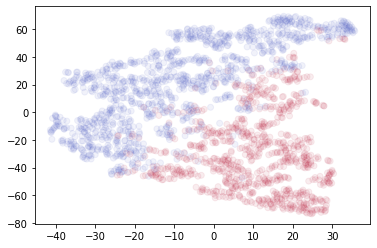

In [3]:
X_embedded = TSNE(n_components=2).fit_transform(data_file['data'])
plt.scatter(*X_embedded.T, c=data_file['context'], alpha=0.07, cmap='coolwarm')

In [4]:
# Parameters
params = {'batch_size': 128,
          'shuffle': True}

# Split data by label
data_0 = data_file['data'][data_file['labels'].flatten() == 0]
context_0 = data_file['data'][data_file['labels'].flatten() == 0]

data_1 = data_file['data'][data_file['labels'].flatten() == 1]
context_1 = data_file['data'][data_file['labels'].flatten() == 1]

# Generators
label_0_set = TensorDataset(data_0, context_0)
label_0_generator = torch.utils.data.DataLoader(label_0_set, **params)

label_1_set = TensorDataset(data_1, context_1)
label_1_generator = torch.utils.data.DataLoader(label_1_set, **params)


In [5]:
gamma = 0.5
Fair = BinaryFair(data_dim=data_file['data'].shape[-1], 
                  context_dim=data_file['context'].shape[-1], 
                  flow_n_layers = 3,
                  flow_transform_type = 'MaskedAffineAutoregressiveTransform', 
                  classifier_hidden_dim = 32,
                  classifier_n_layers = 4,
                  classifier_activation = 'ReLU',
                  gamma=gamma
                 )
optimizer = torch.optim.AdamW(Fair.parameters(), lr=1e-3, weight_decay=1e-4)
total_losses = []
KL_losses = []
clf_losses = []

In [6]:
n_steps = 1000
Fair.train()
for n_step in trange(n_steps):
    data_0, labels_0 = next(iter(label_0_generator))
    data_1, labels_1 = next(iter(label_1_generator))
    
    optimizer.zero_grad()

    L_KL, L_clf, loss = Fair.loss(data_0, data_1, context_0=None, context_1=None, return_all_losses=True)

    total_losses.append(loss.item())
    KL_losses.append(L_KL.item())
    clf_losses.append(L_clf.item())

    loss.backward()
    optimizer.step()
Fair.eval();

  1%|          | 6/1000 [00:00<00:17, 57.83it/s]

tensor([[ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.

  2%|▏         | 20/1000 [00:00<00:15, 61.53it/s]

tensor([[ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.0019],
        [ 0.

  3%|▎         | 34/1000 [00:00<00:19, 49.84it/s]

tensor([[ 0.0016],
        [ 0.0016],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0016],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0016],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0016],
        [ 0.0016],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0016],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.0017],
        [ 0.

  5%|▍         | 46/1000 [00:00<00:17, 53.87it/s]

tensor([[ 0.0012],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0012],
        [ 0.0013],
        [ 0.0012],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0014],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0014],
        [ 0.0013],
        [ 0.0012],
        [ 0.0013],
        [ 0.0012],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0014],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0013],
        [ 0.0014],
        [ 0.0013],
        [ 0.

  5%|▌         | 52/1000 [00:00<00:17, 54.89it/s]

tensor([[ 1.3371e-04],
        [ 1.2367e-04],
        [ 1.8767e-04],
        [ 2.3780e-04],
        [ 2.1959e-04],
        [ 2.1809e-04],
        [ 1.6332e-04],
        [ 2.0233e-04],
        [ 1.7217e-04],
        [ 2.1802e-04],
        [ 1.1294e-04],
        [ 1.2910e-04],
        [ 1.5018e-04],
        [ 1.0858e-04],
        [ 1.9814e-04],
        [ 1.2440e-04],
        [ 1.2746e-04],
        [ 1.9722e-04],
        [ 1.6120e-04],
        [ 1.1544e-04],
        [ 1.7645e-04],
        [ 1.1622e-04],
        [ 1.1752e-04],
        [ 1.1339e-04],
        [ 3.6094e-04],
        [ 1.7105e-04],
        [ 1.2050e-04],
        [ 1.0133e-04],
        [ 1.6157e-04],
        [ 2.1324e-04],
        [ 1.6974e-04],
        [ 1.2919e-04],
        [ 1.4284e-04],
        [ 1.2947e-04],
        [ 1.5663e-04],
        [ 1.9616e-04],
        [ 1.1727e-04],
        [ 1.9139e-04],
        [ 2.2383e-04],
        [ 1.5379e-04],
        [ 1.2349e-04],
        [ 1.6262e-04],
        [ 1.6226e-04],
        [ 1

  6%|▋         | 64/1000 [00:01<00:17, 54.18it/s]

tensor([[ 8.2607e-11],
        [ 3.2185e-10],
        [ 7.8408e-09],
        [ 1.5534e-10],
        [ 3.1303e-11],
        [ 1.3509e-08],
        [ 5.0636e-10],
        [ 5.8438e-11],
        [ 5.4545e-10],
        [ 3.7759e-11],
        [ 2.4539e-10],
        [ 5.8494e-10],
        [ 5.2762e-11],
        [ 1.9507e-09],
        [ 3.6559e-11],
        [ 5.4479e-11],
        [ 4.9326e-11],
        [ 1.5135e-09],
        [ 1.8529e-08],
        [ 2.7938e-09],
        [ 8.8264e-10],
        [ 1.6181e-09],
        [ 1.7501e-09],
        [ 8.5902e-10],
        [ 2.1902e-09],
        [ 4.1394e-11],
        [ 4.1072e-10],
        [ 3.5875e-08],
        [ 2.2097e-10],
        [ 5.4848e-09],
        [ 4.8808e-10],
        [ 1.7663e-09],
        [ 4.0569e-10],
        [ 2.1742e-10],
        [ 3.8197e-08],
        [ 2.5486e-08],
        [ 1.6640e-09],
        [ 2.1159e-09],
        [ 4.5318e-11],
        [ 1.1694e-08],
        [ 2.6856e-10],
        [ 1.4514e-09],
        [ 2.7711e-10],
        [ 2

  8%|▊         | 77/1000 [00:01<00:17, 54.19it/s]

tensor([[ 1.4668e-15],
        [ 1.2887e-16],
        [ 1.1441e-15],
        [ 4.6624e-15],
        [ 4.1786e-14],
        [ 3.4748e-15],
        [ 1.7836e-15],
        [ 3.5307e-16],
        [ 2.6474e-17],
        [ 9.3770e-12],
        [ 6.4261e-13],
        [ 3.0691e-16],
        [ 5.1660e-13],
        [ 5.5366e-16],
        [ 9.5715e-16],
        [ 2.8745e-15],
        [ 1.6829e-15],
        [ 6.6510e-15],
        [ 2.0397e-11],
        [ 1.2086e-15],
        [ 8.1105e-14],
        [ 4.0989e-15],
        [ 1.2381e-12],
        [ 7.8832e-16],
        [ 1.1565e-14],
        [ 1.3624e-12],
        [ 9.6069e-13],
        [ 2.1713e-16],
        [ 2.6461e-12],
        [ 6.7710e-12],
        [ 1.3403e-16],
        [ 2.9127e-12],
        [ 2.1445e-12],
        [ 9.4574e-16],
        [ 5.4088e-16],
        [ 3.1412e-17],
        [ 6.3698e-13],
        [ 3.1321e-16],
        [ 5.1702e-16],
        [ 2.0604e-14],
        [ 7.0144e-16],
        [ 9.1753e-15],
        [ 6.8824e-14],
        [ 2

  9%|▉         | 91/1000 [00:01<00:15, 58.15it/s]

tensor([[1.8738e-20],
        [1.1642e-17],
        [1.5092e-19],
        [1.3173e-14],
        [8.7707e-15],
        [6.3911e-18],
        [1.4976e-18],
        [2.8035e-17],
        [4.1197e-18],
        [1.9624e-18],
        [1.4994e-16],
        [3.8587e-17],
        [1.0755e-18],
        [2.9483e-21],
        [7.5601e-15],
        [2.4713e-21],
        [7.1746e-20],
        [9.5423e-20],
        [2.1988e-18],
        [3.4014e-17],
        [1.6105e-18],
        [6.2921e-22],
        [1.8794e-16],
        [7.3597e-20],
        [1.8908e-19],
        [1.7257e-21],
        [5.7916e-17],
        [6.3310e-21],
        [1.6789e-17],
        [2.5228e-19],
        [1.0516e-19],
        [7.3857e-17],
        [5.6589e-16],
        [5.2899e-20],
        [1.8832e-21],
        [2.3516e-21],
        [1.3726e-15],
        [4.0361e-17],
        [1.6700e-15],
        [1.3545e-18],
        [1.3246e-19],
        [3.4768e-18],
        [4.9578e-16],
        [6.4343e-18],
        [4.0992e-17],
        [7

 10%|█         | 105/1000 [00:01<00:14, 60.06it/s]

tensor([[1.4633e-22],
        [1.4364e-17],
        [1.3892e-22],
        [2.1965e-20],
        [1.9412e-17],
        [7.9938e-16],
        [1.3654e-17],
        [1.3367e-18],
        [2.0248e-20],
        [6.2155e-20],
        [2.2420e-18],
        [3.7935e-18],
        [6.2215e-18],
        [4.2486e-15],
        [2.0606e-17],
        [3.7336e-20],
        [1.0136e-17],
        [7.9993e-20],
        [4.9250e-19],
        [4.7927e-21],
        [1.2506e-21],
        [1.7892e-15],
        [2.1894e-22],
        [2.7768e-21],
        [1.4921e-19],
        [3.9394e-17],
        [2.4438e-20],
        [5.9078e-20],
        [1.7836e-16],
        [1.2760e-21],
        [9.9999e-22],
        [1.0184e-18],
        [1.5485e-16],
        [4.4631e-14],
        [8.0671e-17],
        [7.9897e-22],
        [2.3997e-16],
        [4.2292e-18],
        [1.0548e-20],
        [1.5500e-17],
        [1.9932e-19],
        [2.0906e-16],
        [8.1285e-19],
        [1.0650e-21],
        [7.0502e-19],
        [1

 11%|█         | 112/1000 [00:01<00:15, 58.66it/s]

tensor([[8.9628e-22],
        [2.1102e-16],
        [5.3620e-16],
        [1.4336e-18],
        [1.2481e-14],
        [1.7197e-19],
        [1.1845e-17],
        [7.1406e-20],
        [6.2448e-16],
        [1.8374e-23],
        [3.3575e-15],
        [7.2855e-19],
        [3.5731e-21],
        [1.3167e-17],
        [1.1196e-13],
        [2.6743e-18],
        [1.1554e-18],
        [6.3651e-21],
        [2.4773e-16],
        [1.5576e-23],
        [1.9104e-20],
        [1.9974e-20],
        [3.3690e-20],
        [1.4207e-18],
        [1.7712e-17],
        [6.6014e-18],
        [2.2821e-20],
        [4.6463e-16],
        [1.2736e-19],
        [2.7187e-15],
        [3.5937e-18],
        [8.7498e-22],
        [2.0779e-21],
        [3.3257e-23],
        [2.0351e-21],
        [8.1456e-20],
        [2.0773e-21],
        [3.3799e-17],
        [9.6559e-14],
        [1.4301e-15],
        [3.2616e-20],
        [5.6369e-20],
        [9.4494e-19],
        [4.1060e-17],
        [7.3034e-16],
        [1

 12%|█▏        | 124/1000 [00:02<00:16, 53.67it/s]

tensor([[2.7392e-18],
        [4.6577e-22],
        [8.8779e-18],
        [2.2700e-23],
        [8.6803e-22],
        [2.4642e-20],
        [7.5806e-17],
        [9.7981e-21],
        [6.2111e-18],
        [1.3141e-17],
        [3.0274e-21],
        [1.6832e-21],
        [4.7223e-20],
        [2.1400e-22],
        [5.9582e-21],
        [1.2424e-19],
        [1.1049e-22],
        [1.8354e-16],
        [1.1098e-19],
        [3.4026e-16],
        [6.7605e-17],
        [8.4848e-21],
        [9.7964e-17],
        [4.3143e-18],
        [4.4307e-21],
        [4.3932e-17],
        [4.1725e-20],
        [1.4350e-13],
        [4.9244e-14],
        [6.6455e-21],
        [6.3433e-14],
        [6.8819e-19],
        [1.4416e-21],
        [1.0005e-22],
        [2.3339e-18],
        [1.4449e-21],
        [1.1784e-21],
        [4.3188e-10],
        [7.0747e-23],
        [6.9960e-22],
        [4.7634e-20],
        [3.4012e-23],
        [9.0786e-22],
        [2.9854e-22],
        [2.3124e-20],
        [1

 14%|█▍        | 138/1000 [00:02<00:14, 59.41it/s]

tensor([[2.6243e-18],
        [7.1480e-16],
        [2.1878e-18],
        [3.8174e-21],
        [2.8957e-17],
        [5.5319e-20],
        [1.7392e-18],
        [2.4079e-19],
        [5.7378e-20],
        [2.3384e-21],
        [4.2099e-20],
        [4.4690e-16],
        [1.3719e-19],
        [5.1688e-21],
        [2.2294e-17],
        [2.6243e-20],
        [6.4985e-20],
        [1.0061e-17],
        [3.3735e-19],
        [6.2009e-17],
        [6.9988e-21],
        [8.8401e-13],
        [1.7921e-17],
        [2.2794e-18],
        [2.4810e-22],
        [3.1079e-22],
        [6.6303e-22],
        [2.7544e-21],
        [1.2027e-20],
        [7.2243e-21],
        [1.3537e-19],
        [4.8002e-20],
        [5.0869e-18],
        [3.1895e-21],
        [8.3463e-22],
        [1.2413e-19],
        [6.5275e-21],
        [3.6666e-15],
        [2.8972e-22],
        [4.2307e-16],
        [8.1346e-23],
        [1.4732e-20],
        [1.3160e-22],
        [2.6894e-19],
        [1.4330e-12],
        [5

 15%|█▌        | 151/1000 [00:02<00:14, 58.56it/s]

tensor([[3.8051e-20],
        [6.6543e-20],
        [2.2450e-20],
        [9.1181e-17],
        [6.3772e-19],
        [5.1562e-20],
        [9.4571e-23],
        [1.4605e-13],
        [1.5479e-18],
        [1.8477e-21],
        [1.8913e-17],
        [3.3105e-17],
        [2.2549e-15],
        [3.0619e-13],
        [1.2589e-19],
        [8.2179e-18],
        [2.6069e-18],
        [1.9411e-18],
        [5.2236e-18],
        [3.7408e-21],
        [7.9718e-24],
        [5.2484e-18],
        [3.3543e-22],
        [2.5402e-22],
        [4.2532e-18],
        [6.7252e-19],
        [2.8522e-18],
        [4.3147e-22],
        [4.2075e-23],
        [9.1906e-22],
        [6.8271e-17],
        [6.9323e-20],
        [1.0943e-20],
        [4.1241e-20],
        [2.1054e-20],
        [5.1432e-16],
        [5.6837e-22],
        [2.3318e-20],
        [5.6178e-16],
        [1.5903e-16],
        [1.2316e-21],
        [6.8605e-21],
        [3.6885e-16],
        [4.8911e-16],
        [1.3622e-13],
        [3

 16%|█▋        | 164/1000 [00:02<00:14, 59.00it/s]

tensor([[5.0433e-21],
        [3.7851e-21],
        [2.4990e-19],
        [7.0991e-19],
        [1.2111e-20],
        [5.7027e-23],
        [3.7887e-20],
        [5.6072e-20],
        [3.5708e-21],
        [6.3728e-22],
        [1.9861e-21],
        [2.2414e-20],
        [3.0236e-22],
        [3.2601e-18],
        [1.8710e-14],
        [1.0877e-21],
        [6.3693e-20],
        [3.4186e-16],
        [4.5462e-17],
        [3.9312e-17],
        [2.7409e-20],
        [2.5605e-16],
        [1.0040e-23],
        [6.2661e-19],
        [1.0620e-22],
        [2.5168e-21],
        [9.8922e-24],
        [4.8935e-20],
        [5.5124e-20],
        [4.1740e-23],
        [2.7191e-17],
        [3.3751e-20],
        [6.7234e-16],
        [4.5237e-19],
        [4.0823e-23],
        [3.7237e-21],
        [1.5162e-21],
        [2.4016e-15],
        [8.3725e-19],
        [6.5972e-18],
        [1.2967e-21],
        [4.9119e-21],
        [6.9032e-20],
        [3.6270e-17],
        [7.6538e-21],
        [1

 18%|█▊        | 177/1000 [00:03<00:14, 55.04it/s]

tensor([[1.2252e-22],
        [6.2760e-22],
        [2.3100e-11],
        [1.2646e-17],
        [5.5731e-21],
        [2.6374e-19],
        [5.4987e-21],
        [1.0722e-20],
        [3.2972e-17],
        [4.8890e-20],
        [8.7841e-18],
        [2.7088e-17],
        [1.9602e-15],
        [1.9142e-22],
        [5.6038e-21],
        [1.2353e-19],
        [2.8812e-22],
        [9.8668e-23],
        [1.8606e-17],
        [2.0144e-18],
        [9.8125e-20],
        [6.1474e-20],
        [1.9648e-17],
        [2.4867e-18],
        [8.7313e-13],
        [1.2610e-19],
        [1.2357e-18],
        [1.7570e-17],
        [5.3979e-21],
        [7.7760e-20],
        [3.1724e-13],
        [4.3277e-16],
        [1.1752e-16],
        [2.8191e-22],
        [1.6654e-19],
        [3.2892e-18],
        [2.0170e-23],
        [5.6707e-19],
        [3.1084e-21],
        [2.6296e-19],
        [1.5843e-19],
        [5.9972e-15],
        [3.0199e-23],
        [1.3228e-19],
        [8.2707e-15],
        [6

 19%|█▉        | 190/1000 [00:03<00:14, 57.39it/s]

tensor([[1.6759e-22],
        [2.5756e-19],
        [5.5011e-21],
        [6.5957e-18],
        [3.6274e-19],
        [4.8520e-21],
        [3.6904e-13],
        [9.0374e-20],
        [2.2225e-22],
        [2.6385e-19],
        [3.3573e-22],
        [2.6795e-17],
        [4.3739e-18],
        [9.4571e-17],
        [4.8734e-21],
        [4.8850e-21],
        [5.4003e-21],
        [3.1311e-21],
        [9.9016e-19],
        [9.1445e-22],
        [1.2149e-17],
        [3.3295e-21],
        [3.0330e-22],
        [2.0151e-18],
        [6.7221e-16],
        [4.4873e-16],
        [8.1616e-23],
        [7.2838e-19],
        [6.7962e-14],
        [4.1582e-16],
        [1.1026e-18],
        [3.1441e-20],
        [6.4768e-22],
        [1.3819e-21],
        [1.2119e-17],
        [3.2593e-18],
        [6.5710e-15],
        [1.6064e-21],
        [1.1587e-21],
        [1.8815e-19],
        [9.3715e-18],
        [3.6535e-20],
        [5.4042e-20],
        [2.9204e-20],
        [4.6460e-14],
        [1

 20%|██        | 202/1000 [00:03<00:13, 57.57it/s]

tensor([[1.5360e-23],
        [2.0292e-18],
        [6.2850e-22],
        [7.8835e-22],
        [4.4974e-23],
        [1.4191e-20],
        [7.4011e-21],
        [1.3386e-21],
        [2.2427e-20],
        [5.0411e-22],
        [5.6632e-23],
        [1.0893e-21],
        [3.3326e-21],
        [1.0359e-20],
        [7.4124e-17],
        [1.0412e-15],
        [9.2765e-20],
        [4.5603e-16],
        [7.1840e-18],
        [2.8460e-17],
        [3.0245e-23],
        [1.8959e-15],
        [7.3873e-19],
        [6.7577e-15],
        [1.9445e-23],
        [6.3839e-22],
        [9.4634e-17],
        [1.1732e-17],
        [1.7065e-16],
        [3.1746e-13],
        [2.5650e-20],
        [7.4638e-18],
        [5.5587e-23],
        [7.5151e-15],
        [1.3290e-20],
        [6.1255e-19],
        [8.7431e-24],
        [3.4067e-21],
        [4.3956e-20],
        [6.5747e-15],
        [6.6004e-18],
        [1.2605e-22],
        [2.4172e-22],
        [8.1256e-16],
        [7.0430e-20],
        [7

 21%|██▏       | 214/1000 [00:03<00:15, 51.54it/s]

tensor([[2.6831e-17],
        [6.3602e-19],
        [7.8898e-20],
        [1.0675e-22],
        [1.2153e-19],
        [9.6065e-20],
        [9.8794e-18],
        [2.8414e-18],
        [1.4203e-20],
        [9.5526e-15],
        [3.2919e-18],
        [5.5854e-21],
        [1.0730e-14],
        [2.1710e-20],
        [7.1181e-20],
        [1.9618e-18],
        [3.2951e-18],
        [1.2987e-21],
        [6.3779e-20],
        [8.4535e-18],
        [6.7301e-16],
        [1.3444e-18],
        [6.2654e-22],
        [1.2829e-22],
        [2.3927e-19],
        [1.1338e-17],
        [4.1332e-20],
        [5.1283e-16],
        [6.3897e-22],
        [2.5258e-22],
        [3.5675e-23],
        [1.5290e-22],
        [3.0715e-19],
        [7.4690e-18],
        [3.0283e-22],
        [1.1760e-20],
        [4.1626e-19],
        [8.5942e-21],
        [9.0521e-19],
        [7.5537e-22],
        [1.9361e-18],
        [6.1695e-20],
        [4.5573e-21],
        [1.0921e-16],
        [3.1493e-20],
        [3

 23%|██▎       | 226/1000 [00:04<00:14, 53.46it/s]

tensor([[1.2038e-18],
        [9.4872e-16],
        [1.7022e-17],
        [1.0257e-21],
        [3.6398e-18],
        [1.2545e-21],
        [3.2615e-23],
        [8.4066e-21],
        [6.9447e-22],
        [3.0367e-23],
        [1.0424e-15],
        [6.0170e-16],
        [1.1263e-20],
        [8.3409e-24],
        [3.3150e-17],
        [7.1049e-19],
        [1.0105e-19],
        [2.8905e-22],
        [4.5540e-17],
        [3.5428e-17],
        [6.5261e-14],
        [8.8625e-18],
        [1.7385e-21],
        [8.9573e-23],
        [2.0265e-19],
        [1.2878e-15],
        [1.2927e-19],
        [1.6086e-19],
        [5.0547e-21],
        [3.5707e-23],
        [2.1428e-20],
        [4.6766e-14],
        [3.1743e-19],
        [2.3512e-18],
        [5.6206e-21],
        [4.5599e-22],
        [4.9231e-21],
        [1.6177e-18],
        [1.2763e-21],
        [6.3641e-20],
        [2.4732e-16],
        [1.1050e-18],
        [9.3358e-21],
        [1.1506e-15],
        [2.5761e-18],
        [9

 23%|██▎       | 232/1000 [00:04<00:16, 45.91it/s]

tensor([[5.0177e-20],
        [2.5779e-18],
        [2.7138e-15],
        [3.3566e-14],
        [6.5373e-21],
        [3.3121e-21],
        [7.5154e-19],
        [2.1600e-20],
        [1.1133e-16],
        [4.4231e-21],
        [4.1888e-23],
        [2.2239e-16],
        [1.9645e-18],
        [2.3619e-19],
        [2.1694e-20],
        [5.4966e-23],
        [4.4978e-16],
        [6.0117e-15],
        [4.0115e-21],
        [1.1579e-14],
        [1.1970e-17],
        [2.3285e-20],
        [6.6966e-16],
        [6.8004e-21],
        [1.9252e-23],
        [3.2395e-23],
        [6.2091e-22],
        [1.7033e-17],
        [2.2320e-20],
        [4.9984e-18],
        [2.2607e-15],
        [2.7490e-20],
        [9.5658e-17],
        [3.4894e-13],
        [4.3209e-18],
        [5.1382e-16],
        [9.4437e-18],
        [4.5682e-16],
        [4.7510e-22],
        [3.9405e-17],
        [2.7168e-17],
        [8.7688e-24],
        [4.6551e-14],
        [3.8289e-19],
        [7.2035e-15],
        [3

 24%|██▍       | 244/1000 [00:04<00:15, 49.47it/s]

tensor([[1.1279e-20],
        [2.5422e-16],
        [1.0745e-14],
        [7.0839e-21],
        [4.3383e-22],
        [2.5263e-21],
        [2.6129e-21],
        [4.6530e-22],
        [1.3463e-19],
        [1.0422e-19],
        [5.5220e-22],
        [8.2127e-18],
        [2.0218e-18],
        [3.3140e-21],
        [4.9749e-15],
        [2.8264e-21],
        [1.2102e-20],
        [1.3225e-22],
        [1.3470e-18],
        [1.0701e-22],
        [2.2399e-18],
        [7.0432e-16],
        [9.5905e-17],
        [3.7974e-18],
        [9.9197e-20],
        [1.2481e-21],
        [6.4453e-17],
        [9.9353e-19],
        [7.5006e-20],
        [4.5383e-19],
        [1.1635e-21],
        [7.0478e-17],
        [1.9529e-22],
        [7.1916e-17],
        [2.7470e-19],
        [5.5230e-21],
        [2.5280e-20],
        [8.8155e-18],
        [2.4074e-15],
        [3.0384e-22],
        [8.3197e-18],
        [7.9091e-22],
        [1.8670e-17],
        [3.7674e-17],
        [5.6286e-21],
        [9

 25%|██▌       | 250/1000 [00:04<00:14, 51.47it/s]

tensor([[2.4377e-23],
        [1.8226e-17],
        [1.7240e-17],
        [1.1671e-22],
        [1.3833e-18],
        [6.4495e-17],
        [7.1269e-19],
        [3.2723e-18],
        [1.1145e-16],
        [2.5097e-18],
        [2.1474e-22],
        [2.6892e-21],
        [4.4295e-21],
        [8.2684e-18],
        [8.9702e-21],
        [1.2793e-21],
        [5.4264e-21],
        [2.7851e-22],
        [8.9930e-20],
        [4.4072e-16],
        [6.3008e-22],
        [3.3169e-21],
        [1.7113e-16],
        [3.5966e-18],
        [9.8430e-24],
        [3.6702e-20],
        [1.0214e-21],
        [4.5417e-19],
        [2.5810e-18],
        [1.6890e-15],
        [6.6187e-19],
        [1.8819e-13],
        [1.2413e-18],
        [1.1589e-14],
        [2.6069e-18],
        [2.8020e-17],
        [4.1789e-19],
        [3.6141e-17],
        [2.9980e-19],
        [4.5091e-20],
        [6.2911e-19],
        [4.9133e-20],
        [1.2061e-18],
        [5.3036e-19],
        [2.6310e-20],
        [4

 26%|██▌       | 262/1000 [00:04<00:16, 45.45it/s]

tensor([[6.1810e-20],
        [1.4795e-21],
        [5.2832e-17],
        [3.0226e-20],
        [5.3964e-22],
        [9.2096e-18],
        [7.9093e-16],
        [4.1807e-22],
        [3.2469e-23],
        [3.0725e-20],
        [9.5811e-22],
        [4.0127e-13],
        [3.0401e-23],
        [3.7429e-21],
        [2.0375e-19],
        [3.0629e-13],
        [9.5055e-16],
        [9.9376e-17],
        [8.2107e-23],
        [1.0902e-21],
        [2.7640e-20],
        [2.4290e-22],
        [4.1475e-20],
        [8.3770e-17],
        [1.2961e-19],
        [2.7173e-16],
        [6.1033e-20],
        [5.4365e-22],
        [8.8705e-22],
        [2.8526e-17],
        [1.3730e-22],
        [1.0331e-21],
        [3.0848e-22],
        [1.2331e-22],
        [1.0131e-19],
        [1.4514e-18],
        [7.2622e-22],
        [1.1675e-21],
        [2.7543e-20],
        [7.6946e-23],
        [2.4641e-19],
        [5.2259e-18],
        [1.2499e-23],
        [2.8501e-18],
        [8.2854e-21],
        [2

 27%|██▋       | 274/1000 [00:05<00:15, 46.25it/s]

tensor([[3.0874e-22],
        [1.2510e-21],
        [9.9610e-24],
        [2.6416e-17],
        [3.0900e-19],
        [4.3056e-16],
        [2.2441e-18],
        [2.3998e-20],
        [2.4313e-21],
        [7.4390e-16],
        [6.3315e-19],
        [1.2603e-17],
        [8.4902e-17],
        [4.2012e-21],
        [3.9195e-22],
        [6.2985e-19],
        [7.6348e-20],
        [2.7875e-17],
        [1.0325e-21],
        [2.7279e-17],
        [1.5218e-20],
        [5.4355e-20],
        [1.2828e-20],
        [2.1344e-19],
        [1.2970e-19],
        [1.2128e-20],
        [1.7480e-22],
        [5.5918e-23],
        [6.1897e-19],
        [8.3345e-18],
        [1.9520e-15],
        [1.3457e-20],
        [8.2071e-22],
        [3.4106e-22],
        [5.8476e-18],
        [3.4112e-23],
        [6.7566e-21],
        [4.0849e-17],
        [1.3124e-14],
        [7.2636e-19],
        [6.8239e-20],
        [4.4891e-20],
        [4.3961e-18],
        [1.4117e-21],
        [2.6339e-16],
        [2

 29%|██▉       | 288/1000 [00:05<00:12, 54.81it/s]

tensor([[1.1652e-21],
        [2.9042e-22],
        [5.7533e-22],
        [5.2575e-18],
        [3.0572e-19],
        [9.2275e-18],
        [9.0009e-23],
        [7.4769e-20],
        [2.5499e-13],
        [9.5962e-22],
        [3.6773e-20],
        [2.8537e-18],
        [1.2605e-20],
        [7.8317e-19],
        [8.2132e-22],
        [1.3368e-20],
        [2.1358e-19],
        [5.7498e-18],
        [1.7080e-17],
        [4.8780e-19],
        [2.1552e-18],
        [1.8841e-13],
        [1.3542e-19],
        [2.7542e-19],
        [2.4454e-21],
        [1.4623e-13],
        [1.1311e-20],
        [2.6549e-19],
        [1.9996e-21],
        [1.5965e-18],
        [1.2837e-20],
        [6.0351e-16],
        [4.8063e-21],
        [2.9930e-19],
        [1.3842e-20],
        [3.3388e-23],
        [7.2287e-22],
        [4.3333e-18],
        [3.8125e-20],
        [5.4050e-22],
        [1.3752e-22],
        [8.3633e-15],
        [8.0713e-22],
        [4.5134e-17],
        [5.2964e-19],
        [8

 30%|███       | 302/1000 [00:05<00:11, 59.27it/s]

tensor([[4.6841e-21],
        [6.1365e-18],
        [9.7969e-23],
        [1.1101e-18],
        [1.3263e-21],
        [6.2751e-20],
        [2.6637e-15],
        [7.6773e-20],
        [1.3895e-20],
        [2.2416e-22],
        [9.8784e-24],
        [1.2135e-16],
        [3.4829e-19],
        [6.1212e-23],
        [2.4423e-19],
        [2.0421e-19],
        [2.5040e-18],
        [3.3844e-22],
        [2.3506e-22],
        [5.2366e-18],
        [6.4145e-20],
        [7.8593e-22],
        [2.6878e-21],
        [4.3368e-18],
        [1.3381e-20],
        [2.3386e-20],
        [3.2359e-22],
        [1.2509e-21],
        [1.0278e-22],
        [2.0284e-18],
        [4.4531e-14],
        [3.8441e-19],
        [5.9138e-21],
        [2.7071e-21],
        [7.5478e-15],
        [3.0599e-19],
        [3.3087e-18],
        [5.6199e-21],
        [3.4178e-23],
        [6.9838e-22],
        [3.1847e-19],
        [1.2201e-20],
        [1.2156e-17],
        [1.3479e-20],
        [5.2754e-23],
        [1

 32%|███▏      | 315/1000 [00:05<00:12, 55.32it/s]

tensor([[1.1689e-18],
        [3.3878e-22],
        [8.2448e-18],
        [1.8741e-17],
        [1.3481e-14],
        [3.4926e-21],
        [5.5565e-20],
        [5.6239e-20],
        [7.1014e-20],
        [1.1120e-16],
        [7.7444e-18],
        [9.5489e-19],
        [2.7097e-21],
        [5.5302e-23],
        [1.0974e-21],
        [5.4773e-23],
        [3.1705e-20],
        [3.3112e-18],
        [4.9318e-20],
        [3.1804e-16],
        [1.0299e-11],
        [2.0381e-19],
        [6.0207e-14],
        [3.3205e-17],
        [3.6558e-19],
        [3.4202e-22],
        [5.1758e-20],
        [9.1735e-23],
        [1.3654e-13],
        [1.8973e-17],
        [2.8679e-21],
        [2.3401e-16],
        [8.5827e-21],
        [1.0984e-21],
        [6.5340e-20],
        [4.0409e-19],
        [6.1270e-17],
        [5.2914e-21],
        [2.6977e-17],
        [1.0534e-14],
        [1.2899e-21],
        [3.6251e-17],
        [3.1988e-12],
        [1.4268e-17],
        [1.4556e-18],
        [4

 32%|███▏      | 321/1000 [00:05<00:13, 51.63it/s]

tensor([[1.2858e-21],
        [2.9213e-20],
        [1.3258e-22],
        [2.4192e-23],
        [3.1674e-17],
        [8.9133e-18],
        [5.7981e-22],
        [1.3308e-23],
        [6.2506e-22],
        [1.7471e-21],
        [2.7007e-16],
        [2.6432e-20],
        [6.3178e-19],
        [8.4114e-24],
        [8.4768e-17],
        [2.4228e-14],
        [3.7732e-18],
        [1.7709e-17],
        [3.2628e-23],
        [3.2843e-18],
        [2.2621e-15],
        [3.8154e-18],
        [5.5256e-23],
        [6.9637e-20],
        [1.0377e-21],
        [1.2964e-22],
        [2.1364e-15],
        [1.3890e-18],
        [1.7282e-15],
        [8.2517e-17],
        [4.8186e-21],
        [6.0794e-19],
        [8.3008e-18],
        [6.7315e-14],
        [8.3286e-17],
        [1.2212e-17],
        [2.4858e-16],
        [5.8474e-20],
        [1.5245e-17],
        [7.2378e-19],
        [2.1510e-17],
        [3.1077e-18],
        [1.5959e-16],
        [5.4210e-22],
        [2.2544e-20],
        [5

 33%|███▎      | 332/1000 [00:06<00:14, 45.75it/s]

tensor([[2.0409e-19],
        [1.4612e-20],
        [3.5756e-21],
        [3.4576e-19],
        [3.2011e-12],
        [6.0651e-19],
        [3.2907e-23],
        [4.0008e-18],
        [6.8979e-21],
        [2.7260e-15],
        [2.2231e-18],
        [2.3441e-20],
        [1.3359e-19],
        [2.1521e-17],
        [1.2386e-21],
        [7.7370e-23],
        [7.2898e-19],
        [2.4154e-21],
        [2.0016e-19],
        [5.9468e-19],
        [1.3722e-20],
        [2.2631e-20],
        [3.2860e-18],
        [2.5047e-23],
        [4.8927e-19],
        [2.1588e-19],
        [3.6129e-18],
        [5.4342e-21],
        [2.8723e-21],
        [7.1206e-21],
        [4.8657e-20],
        [1.7296e-16],
        [6.0493e-16],
        [3.8828e-22],
        [1.7314e-17],
        [1.3022e-22],
        [8.6671e-21],
        [3.7598e-20],
        [3.4979e-21],
        [2.0066e-21],
        [7.4155e-24],
        [1.3642e-14],
        [2.6945e-21],
        [4.2281e-17],
        [4.9226e-22],
        [7

 34%|███▍      | 344/1000 [00:06<00:13, 50.17it/s]

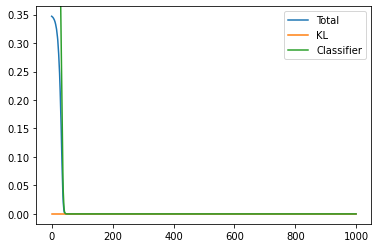

In [ ]:
plt.plot(total_losses, label="Total")
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot(KL_losses, label="KL")
plt.plot(clf_losses, label="Classifier")
plt.legend()
plt.xlim(*xlims)
plt.ylim(*ylims)
plt.show()

In [ ]:
Fair.sample(2)

tensor([[   2.2319, -170.3101,   33.4719,   -2.1292,    0.5639,   -5.6127],
        [ 138.6995,    3.1799,   -4.1070,    1.4723,   -0.3678,   -3.4292]],
       grad_fn=<AddBackward0>)

In [ ]:
with torch.no_grad():
    cont_pred = Fair(data_file['data'], data_file['context']).sigmoid()
    bin_pred = (cont_pred > 0.5).int()
    acc = accuracy_score(bin_pred, data_file['labels'])
acc

NotImplementedError: 

Accuracies:
    gamma = 0. : 0.84  # paper achieves 85.2 (not too far off)
    gamma = 1. : 0.5

In [ ]:
with torch.no_grad():
    embedding = Fair.embed(data_file['data'], data_file['context'])[0]
    X_embedded = TSNE(n_components=2).fit_transform(embedding)
plt.scatter(*X_embedded.T, c=data_file['context'], alpha=0.02, cmap='coolwarm')

In [ ]:
with torch.no_grad():
    embedding = Fair.embed(data_file['data'], 0*data_file['context'])[0]
    X_embedded = TSNE(n_components=2).fit_transform(embedding)
plt.scatter(*X_embedded.T, c=data_file['context'], alpha=0.02, cmap='coolwarm')

In [ ]:
with torch.no_grad():
    embedding = Fair._embed(data_file['data'])[0]
    X_embedded = TSNE(n_components=2).fit_transform(embedding)
plt.scatter(*X_embedded.T, c=data_file['context'], alpha=0.02, cmap='coolwarm')

In [ ]:
n_samples = 1000
with torch.no_grad():
    samples_0 = Fair.sample(1, context=torch.zeros(n_samples, 1)).squeeze(1)
    samples_1 = Fair.sample(1, context=torch.ones(n_samples, 1)).squeeze(1)
EmpiricalStatisticalDistance(samples_0, samples_1, 
                             hidden_dim=32, n_layers=2, n_epochs=100)